# Vaccination Rates and Socioeconomic Status in BC

### Project authors:

### Created on: October 25, 2021

### Last modified on: October 25, 2021

## Import libraries

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder


In [98]:
# load dataframes
modelling_df = pd.read_csv('../data/socioeco_compiled.csv')
vaccine_df = pd.read_csv('../data/BCCDC_COVID19_CHSA_Data_NHA.csv')
modelling_df.columns

Index(['m_0_4', 'm_5_9', 'm_10_14', 'm_15_19', 'm_20_24', 'm_25_29', 'm_30_34',
       'm_35_39', 'm_40_44', 'm_45_49',
       ...
       'rheumatoid_arthritis_age_standardized_prevalence_per_100',
       'schizophrenia_incidence_per_1000', 'schizophrenia_prevalence_per_100',
       'schizophrenia_age_standardized_incidence_per_1000',
       'schizophrenia_age_standardized_prevalence_per_100', 'hsa', 'subregion',
       'proportion_has_GP_practitioner.1', 'proportion_has_GP_practice.1',
       'code'],
      dtype='object', length=207)

In [99]:
# subset dataframes
modelling_df = modelling_df[['code','percent_dwellings_need_repairs','percent_detached_houses',
'situational_vulnerability', 'ethnocultural_composition', 'economic_dependency', 'residential_instability', 
'percent_aboriginal', 'percent_chinese', 'percent_filipino', 'percent_white',
'percent_immigrant', 'percent_no_eng_fra', 'percent_less_than_high_school', 'employment_rate', 'hsa']]
vaccine_df = vaccine_df[['CHSA18_Code','D1_12_coverage']]
vaccine_df.columns = ['code', 'D1_12_coverage']

# merge dataframes
m_df = pd.merge(modelling_df, vaccine_df, how = 'inner', on="code")
print(len(m_df))
m_df.head()

151


,code,percent_dwellings_need_repairs,percent_detached_houses,situational_vulnerability,ethnocultural_composition,economic_dependency,residential_instability,percent_aboriginal,percent_chinese,percent_filipino,percent_white,percent_immigrant,percent_no_eng_fra,percent_less_than_high_school,employment_rate,hsa,D1_12_coverage
0,3112,5.4%,60.7%,3.0,5.0,4.0,2.0,0.6%,65.4%,4.2%,18.5%,65.4%,13.3%,13.0%,49.5%,Vancouver Coastal Health,84.0
1,3223,10.6%,8.5%,4.0,4.0,1.0,5.0,7.8%,13.4%,3.0%,64.2%,26.6%,4.3%,14.0%,69.9%,Vancouver Coastal Health,89.0
2,3115,4.6%,48.7%,2.0,5.0,3.0,2.0,1.6%,30.9%,5.3%,46.8%,40.4%,4.4%,10.4%,60.0%,Vancouver Coastal Health,90.0
3,3261,7.2%,16.4%,4.0,5.0,3.0,4.0,1.5%,40.2%,8.9%,27.0%,52.2%,9.1%,16.6%,59.2%,Vancouver Coastal Health,92.0
4,3312,6.2%,6.3%,2.0,5.0,1.0,5.0,3.8%,4.2%,6.6%,62.7%,41.4%,1.8%,8.5%,65.8%,Vancouver Coastal Health,91.0


In [100]:
# remove percent signs
m_df = m_df.replace({'%':''}, regex = True)
m_df = m_df.drop(['code'], axis = 1)
# one hot encode hsa
one_hot = pd.get_dummies(m_df['hsa'])
m_df = m_df.drop('hsa', axis = 1)
m_df = m_df.join(one_hot)


In [101]:
m_df.isna().sum()

percent_dwellings_need_repairs    0
percent_detached_houses           0
situational_vulnerability         3
ethnocultural_composition         3
economic_dependency               3
residential_instability           3
percent_aboriginal                0
percent_chinese                   0
percent_filipino                  0
percent_white                     0
percent_immigrant                 0
percent_no_eng_fra                0
percent_less_than_high_school     0
employment_rate                   0
D1_12_coverage                    0
Fraser Health                     0
Interior Health                   0
Island Health                     0
Northern Health                   0
Vancouver Coastal Health          0
dtype: int64

In [102]:
# remove rows with NAs
m_df = m_df.dropna()
# normalize the data
trans = MinMaxScaler()
'''
m_df.iloc[:, m_df.columns.isin(list(['percent_dwellings_need_repairs', 'percent_detached_houses',
       'percent_aboriginal','percent_chinese', 'percent_filipino', 'percent_white','percent_immigrant', 'percent_no_eng_fra',
       'percent_less_than_high_school', 'employment_rate']))] = trans.fit_transform(m_df.iloc[:, m_df.columns.isin(list(['percent_dwellings_need_repairs', 'percent_detached_houses',
       'percent_aboriginal','percent_chinese', 'percent_filipino', 'percent_white','percent_immigrant', 'percent_no_eng_fra',
       'percent_less_than_high_school', 'employment_rate']))])
'''
X = m_df.drop(columns=['D1_12_coverage']).values
# X = m_df.iloc[:, :-1].values
y = m_df.iloc[:, -6].values


# split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)
# instantiate the regressor and train
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
m_df.head()


,percent_dwellings_need_repairs,percent_detached_houses,situational_vulnerability,ethnocultural_composition,economic_dependency,residential_instability,percent_aboriginal,percent_chinese,percent_filipino,percent_white,percent_immigrant,percent_no_eng_fra,percent_less_than_high_school,employment_rate,D1_12_coverage,Fraser Health,Interior Health,Island Health,Northern Health,Vancouver Coastal Health
0,5.4,60.7,3.0,5.0,4.0,2.0,0.6,65.4,4.2,18.5,65.4,13.3,13.0,49.5,84.0,0,0,0,0,1
1,10.6,8.5,4.0,4.0,1.0,5.0,7.8,13.4,3.0,64.2,26.6,4.3,14.0,69.9,89.0,0,0,0,0,1
2,4.6,48.7,2.0,5.0,3.0,2.0,1.6,30.9,5.3,46.8,40.4,4.4,10.4,60.0,90.0,0,0,0,0,1
3,7.2,16.4,4.0,5.0,3.0,4.0,1.5,40.2,8.9,27.0,52.2,9.1,16.6,59.2,92.0,0,0,0,0,1
4,6.2,6.3,2.0,5.0,1.0,5.0,3.8,4.2,6.6,62.7,41.4,1.8,8.5,65.8,91.0,0,0,0,0,1


0.47341297905879853
Feature: 0, Score: 0.04659
Feature: 1, Score: -0.05222
Feature: 2, Score: 0.28937
Feature: 3, Score: -0.89022
Feature: 4, Score: -0.31726
Feature: 5, Score: -0.72353
Feature: 6, Score: -0.09008
Feature: 7, Score: -0.26706
Feature: 8, Score: 0.14803
Feature: 9, Score: -0.21201
Feature: 10, Score: -0.08868
Feature: 11, Score: 0.67631
Feature: 12, Score: -0.97723
Feature: 13, Score: -0.10482
Feature: 14, Score: 1.33423
Feature: 15, Score: -0.84863
Feature: 16, Score: 4.30326
Feature: 17, Score: -5.83931
Feature: 18, Score: 1.05044


<BarContainer object of 19 artists>

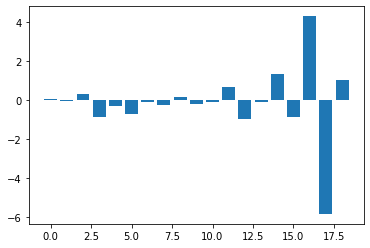

In [103]:
r2 = r2_score(y_test, y_pred)
print(r2)
# get importance
importance = regressor.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)

So the biggest driver of this model is health authority, with Northern Health being the most strongly correlated.

In [104]:
X = m_df.iloc[:, m_df.columns.isin(list(['percent_chinese', 'percent_white', 'percent_no_eng_fra', 
'percent_less_than_high_school']))].values
y = m_df.iloc[:, -1].values


0.47206397980188397
Feature: 0, Score: 0.01171
Feature: 1, Score: 0.00108
Feature: 2, Score: 0.02469
Feature: 3, Score: -0.02343


<BarContainer object of 4 artists>

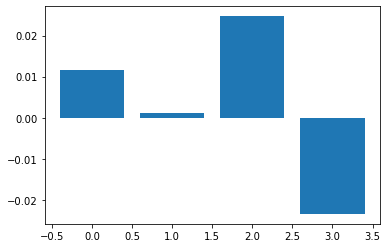

In [105]:
# split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)
# instantiate the regressor and train
regressor_2 = LinearRegression()
regressor_2.fit(X_train, y_train)
y_pred = regressor_2.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)
# get importance
importance = regressor_2.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)

This 4-variable model is most strongly correlated with education and not speaking French or English.

In [51]:
X = m_df.iloc[:, m_df.columns.isin(list(['percent_no_eng_fra', 
'percent_less_than_high_school']))].values
y = m_df.iloc[:, -1].values

0.47206397980188397
Feature: 0, Score: 0.01171
Feature: 1, Score: 0.00108
Feature: 2, Score: 0.02469
Feature: 3, Score: -0.02343


<BarContainer object of 4 artists>

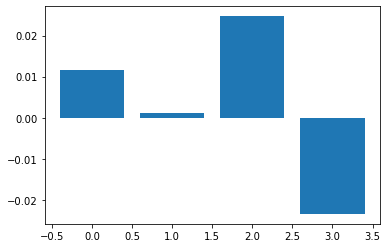

In [106]:
# split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)
# instantiate the regressor and train
regressor_3 = LinearRegression()
regressor_3.fit(X_train, y_train)
y_pred = regressor_3.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)
# get importance
importance = regressor_3.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)